In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [2]:
kar_map = gpd.read_file('mapData\\karnataka_administrative.shp')

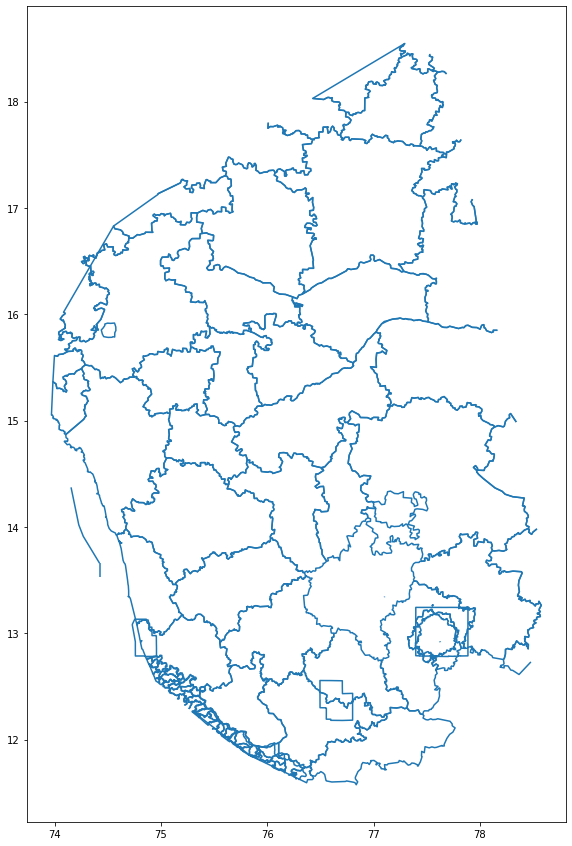

In [3]:
fig, ax = plt.subplots(figsize = (15,15))
kar_map.plot(ax = ax)

In [4]:
kar_map.head()

NAME ADMIN_LEVE  \
0       South Goa          5   
1       North Goa          5   
2      Sindhudurg          5   
3        Kolhapur          5   
4  Uttara Kannada          5   

                                            geometry  
0  LINESTRING (74.2564646 15.4892637, 74.25522220...  
1  LINESTRING (74.12622930000001 15.6502738, 74.1...  
2  LINESTRING (74.08430370000001 16.0182889, 74.0...  
3  LINESTRING (74.6980155 16.7154047, 74.69578540...  
4  LINESTRING (74.28367129999999 15.5195925, 74.2...

In [5]:
df = pd.read_csv('mapData\\apartment_data.csv')
crs = {'init' : 'epsg:4326'}
df = df.drop('geometry', 1)
df['names'] = df['names'].apply(lambda z : z.rsplit(' ', 1)[0])
df.head()

names        lat        lon
0               Purva Skydale  12.894033  77.662362
1   Salarpuria Sattva Cadenza  12.889441  77.640221
2             Shriram Summitt  12.836068  77.667242
3               Shriram Luxor  13.085249  77.654915
4  Ecolife Elements Of Nature  12.938728  77.731126

In [6]:
df2 = pd.read_csv('mapData\\blore_apartment_data.csv')
df2.head()

names             Price             Area  \
0  Salarpuria Sattva Cadenza     39 L -41.65 L        755 sq.ft   
1  Salarpuria Sattva Cadenza        55 L -75 L  1175-1275 sq.ft   
2  Salarpuria Sattva Cadenza  70.04 L -73.30 L  1335-1340 sq.ft   
3  Salarpuria Sattva Cadenza        65 L -95 L  1365-1595 sq.ft   
4              Purva Skydale  76.25 L -1.75 Cr  1273-1371 sq.ft   

           Unit Type  
0    1 BHK Apartment  
1    2 BHK Apartment  
2  2.5 BHK Apartment  
3    3 BHK Apartment  
4    2 BHK Apartment

In [7]:
dfFin = pd.merge(df2, df, left_on = 'names', right_on = 'names')

In [8]:
dfFin.head()

names             Price             Area  \
0  Salarpuria Sattva Cadenza     39 L -41.65 L        755 sq.ft   
1  Salarpuria Sattva Cadenza        55 L -75 L  1175-1275 sq.ft   
2  Salarpuria Sattva Cadenza  70.04 L -73.30 L  1335-1340 sq.ft   
3  Salarpuria Sattva Cadenza        65 L -95 L  1365-1595 sq.ft   
4              Purva Skydale  76.25 L -1.75 Cr  1273-1371 sq.ft   

           Unit Type        lat        lon  
0    1 BHK Apartment  12.889441  77.640221  
1    2 BHK Apartment  12.889441  77.640221  
2  2.5 BHK Apartment  12.889441  77.640221  
3    3 BHK Apartment  12.889441  77.640221  
4    2 BHK Apartment  12.894033  77.662362

In [9]:
def strToNub(x):
    ans = 0
    ans = float(x.rsplit(' ', 1)[0])
    if(x.rsplit(' ', 1)[-1] == 'L'):
        ans = ans/100
    return ans

In [10]:
geometry = [Point(xy) for xy in zip(dfFin['lon'], dfFin['lat'])]

In [11]:
geo_df = gpd.GeoDataFrame(dfFin, crs = crs, geometry = geometry)
geo_df['names'] = geo_df['names'].astype(str)
geo_df['Price'] = geo_df['Price'].astype(str)
geo_df['Price'] = geo_df['Price'].apply(lambda z : strToNub(z.rsplit('-', 1)[-1]))
geo_df['Price'] = (geo_df['Price']*1000).astype(int, errors = 'ignore')
geo_df.head()

names   Price             Area  \
0        Salarpuria Sattva Cadenza   416.5        755 sq.ft   
1        Salarpuria Sattva Cadenza   750.0  1175-1275 sq.ft   
2        Salarpuria Sattva Cadenza   733.0  1335-1340 sq.ft   
3        Salarpuria Sattva Cadenza   950.0  1365-1595 sq.ft   
4                    Purva Skydale  1750.0  1273-1371 sq.ft   
5                    Purva Skydale  1580.0  1625-1929 sq.ft   
6                  Shriram Summitt   540.0        714 sq.ft   
7                  Shriram Summitt  1210.0  1183-1547 sq.ft   
8                  Shriram Summitt     NaN       1564 sq.ft   
9                  Shriram Summitt  1430.0  1564-1850 sq.ft   
10                   Shriram Luxor   800.6       1195 sq.ft   
11                   Shriram Luxor   800.6  1400-1440 sq.ft   
12                   Shriram Luxor  1100.0       1550 sq.ft   
13    Salarpuria Sattva East Crest   394.7        598 sq.ft   
14    Salarpuria Sattva East Crest   774.9  1157-1182 sq.ft   
15    Salarpuria Sattva East Crest   986.5  1404-1533 sq.ft   
16      Ecolife Elements Of Nature   330.0        651 sq.ft   
17      Ecolife Elements Of Nature   770.0   910-1330 sq.ft   
18      Ecolife Elements Of Nature   910.0  1385-1595 sq.ft   
19      Shriram Greenfield Phase 1   750.0   935-1065 sq.ft   
20      Shriram Greenfield Phase 1   660.0  1165-1225 sq.ft   
21      Shriram Greenfield Phase 1   726.8       1350 sq.ft   
22              Provident Sunworth   520.0        883 sq.ft   
23              Provident Sunworth   650.0       1082 sq.ft   
24                Century Infiniti   900.0  1198-1298 sq.ft   
25                Century Infiniti  1080.0  1798-1892 sq.ft   
26                   DSMAX SAROVAR   208.2    782-833 sq.ft   
27                   DSMAX SAROVAR   320.2   995-1174 sq.ft   
28                   DSMAX SAROVAR   409.7       1639 sq.ft   
29               Vaswani Exquisite  1830.0  1835-2345 sq.ft   
...                            ...     ...              ...   
2565     Sai Ashirwad Natures Nest   585.4  1200-1304 sq.ft   
2566     Sai Ashirwad Natures Nest   760.6  1618-1694 sq.ft   
2567     Sai Ashirwad Natures Nest  1120.0  2047-2515 sq.ft   
2568                SRC blue bells   399.9    972-988 sq.ft   
2569      Regency Pinnacle Heights   452.4       1300 sq.ft   
2570                 Amrutha Value   510.0   945-1206 sq.ft   
2571                 Amrutha Value   680.0       1480 sq.ft   
2572              AR Splendor Park   438.5  1146-1253 sq.ft   
2573              AR Splendor Park   438.5  1146-1253 sq.ft   
2574              AR Splendor Park   504.0       1440 sq.ft   
2575              AR Splendor Park   504.0       1440 sq.ft   
2576              AR Splendor Park   603.7  1489-1725 sq.ft   
2577              AR Splendor Park   603.7  1489-1725 sq.ft   
2578                 Vestaa Lushes   242.0   900-1100 sq.ft   
2579                 Vestaa Lushes   319.0  1420-1450 sq.ft   
2580                  HW Archstone   460.0  1105-1274 sq.ft   
2581              SV Lakshmi Nivas   850.0       1368 sq.ft   
2582              SV Lakshmi Nivas   850.0       1368 sq.ft   
2583              SV Lakshmi Nivas  2800.0       1881 sq.ft   
2584              SV Lakshmi Nivas  2800.0       1881 sq.ft   
2585              SV Lakshmi Nivas     NaN       6000 sq.ft   
2586              SV Lakshmi Nivas     NaN       6000 sq.ft   
2587                    Sobha Onyx   894.1  1180-1385 sq.ft   
2588                    Sobha Onyx  1600.0  1822-1946 sq.ft   
2589                    Sobha Onyx  1640.0       2612 sq.ft   
2590                    Sobha Onyx  2310.0       3670 sq.ft   
2591                   Aban Desire   723.3   954-1162 sq.ft   
2592                   Aban Desire   723.3   954-1162 sq.ft   
2593                   Aban Desire  1160.0  1266-1901 sq.ft   
2594                   Aban Desire  1160.0  1266-1901 sq.ft   

              Unit Type        lat        lon  \
0       1 BHK Apartment  12.889441  77.640221   
1       2 BHK Apartment 

In [14]:
geo_df1 = geo_df[geo_df['Unit Type'] == '3 BHK Apartment']
geo_df1.head()

names   Price             Area        Unit Type  \
3      Salarpuria Sattva Cadenza   950.0  1365-1595 sq.ft  3 BHK Apartment   
5                  Purva Skydale  1580.0  1625-1929 sq.ft  3 BHK Apartment   
9                Shriram Summitt  1430.0  1564-1850 sq.ft  3 BHK Apartment   
12                 Shriram Luxor  1100.0       1550 sq.ft  3 BHK Apartment   
15  Salarpuria Sattva East Crest   986.5  1404-1533 sq.ft  3 BHK Apartment   

          lat        lon                             geometry  
3   12.889441  77.640221  POINT (77.64022109999998 12.889441)  
5   12.894033  77.662362  POINT (77.66236169999998 12.894033)  
9   12.836068  77.667242        POINT (77.6672418 12.8360678)  
12  13.085249  77.654915  POINT (77.65491540000001 13.085249)  
15  13.043223  77.748241  POINT (77.74824140000001 13.043223)

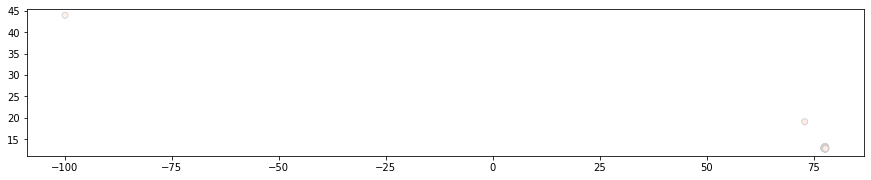

In [13]:
variable = 'Price'
fig, ax = plt.subplots(figsize = (15,15))
geo_df1.plot(column=variable, cmap = 'Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
